<a href="https://colab.research.google.com/github/shawnjiang1019/QuizApp/blob/master/(Student)_lesson_2_Sign_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sign Language

Settings > Miscellaneous > Corgi/Kitty Mode

# Info

Real Time Sign Language Detection with Tensorflow Object Detection and Python: https://youtu.be/pDXdlXlaCco
> Github: https://github.com/nicknochnack/RealTimeObjectDetection

> Official Documentation: https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html

> More tutorial: https://medium.com/swlh/tensorflow-2-object-detection-api-with-google-colab-b2af171e81cc

## Set Runtime to GPU
- Go to Runtime > Change runtime type
- Select GPU in Hardware accelerator from dropdown menu

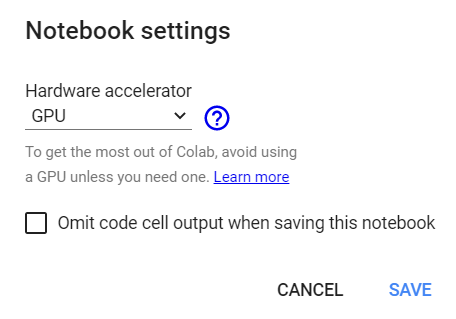

# 1. Setup

## Installing to Local Machine Possible Errors

Installing opencv on local machine: 
```
pip install opencv-python
```

Running setup.py on local machine:
```
python setup.py install
```
or
```
python setup.py install --user
```

## Install

Install
*   **Tensorflow 2**
*   **tf_slim**: TF-Slim is a library that makes defining, training and evaluating neural networks simple: ... Slim makes it easy to extend complex models, and to warm start training algorithms by using pieces of pre-existing model checkpoints.



In [1]:
!pip install -U --pre tensorflow=="2.*"
!pip install tf_slim

Requirement already up-to-date: tensorflow==2.* in /usr/local/lib/python3.7/dist-packages (2.4.1)
     |████████████████████████████████| 358kB 20.2MB/s 


> Install `pycocotools` 
- pycocotools is a Python API that. # assists in loading, parsing and visualizing the annotations (the boxes) in COCO.
  - COCO is a large-scale object detection, segmentation, and captioning dataset. COCO has several features: Object segmentation. Recognition in context. Superpixel stuff segmentation.

> Install `lvis` 
- is a new dataset for Large Vocabulary Instance Segmentation. We collect over 2 million high-quality instance segmentation masks for over 1200 entry-level object categories in 164k images. LVIS API enables reading and interacting with annotation files, visualizing annotations, and evaluating results.

In [2]:
!pip install pycocotools
!pip install lvis

### Tensorflow/models Object Detection API

Get `tensorflow/models` or `cd` to parent directory of the repository.
- Download the entire github repo from https://github.com/tensorflow/models
  - "The TensorFlow Model Garden is a repository with a number of different implementations of state-of-the-art (SOTA) models and modeling solutions for TensorFlow users. We aim to demonstrate the best practices for modeling so that TensorFlow users can take full advantage of TensorFlow for their research and product development."
- See **models** folder in Files section to left

In [3]:
import os
import pathlib

if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone https://github.com/w3ichen/models

Cloning into 'models'...
remote: Enumerating objects: 2353, done.
remote: Counting objects: 100% (2353/2353), done.
remote: Compressing objects: 100% (1777/1777), done.
remote: Total 2353 (delta 550), reused 2353 (delta 550), pack-reused 0
Receiving objects: 100% (2353/2353), 30.70 MiB | 40.72 MiB/s, done.
Resolving deltas: 100% (550/550), done.


If needed: unzipping uploaded `models.zip` file

In [4]:
# %%bash
# cd /content
# unzip models.zip -d models
# mv models models_1
# mv -v /content/models_1/* /content

Compile protobufs and install the object_detection package
-  **protoc** is a compiler for protocol buffers definitions files. It can can generate C++, Java and Python source code for the classes defined in PROTO_FILE.
- Protocol Buffers is a method of serializing structured data. It is useful in developing programs to communicate with each other over a network or for storing data

In [5]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.

- `pip install .` will run the `setup.py` file inside research folder which will install the following packages:
  - Pillow>=1.0
  - Matplotlib>=2.1
  - Cython>=0.28.1
- setup.py build/install will handle dependencies

In [6]:
%%bash 
cd /content/models/research
pip install .

python setup.py build
python setup.py install

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1376595 sha256=325ef86f2b8d7e3840ad9dbd3917032b4d406ffba6d03860ab937b703af33145
  Stored in directory: /tmp/pip-ephem-wheel-cache-auhtb39w/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection
running build
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/inputs_test.py -> build/lib/object_detection
copying object_detection/model_hparams.py -> build/lib/object_detection
copying object_detection/model_lib_tf2_test.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_lib_tf2_test.py -> build/lib/object_detection
copying object_detection/export_inference_graph.py -> build/lib/object_detection
copying object_detection/inputs.py -> build/lib/object_detection
copying object_detection/eval_util.py -> build/lib/object_detection
copyin

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-37: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-37: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-37: module MAY be using inspect.stack


Set Python path so folders inside `models` can be used by other files

In [7]:
os.environ['PYTHONPATH'] += ":/content/models"
os.environ['PYTHONPATH'] += ":/content/models/research/slim"

## Test Installation
Should show the following if successful
```
...
ModelBuilderTF2Test.test_unknown_faster_rcnn_feature_extractor
[ RUN      ] ModelBuilderTF2Test.test_unknown_meta_architecture
[       OK ] ModelBuilderTF2Test.test_unknown_meta_architecture
[ RUN      ] ModelBuilderTF2Test.test_unknown_ssd_feature_extractor
[       OK ] ModelBuilderTF2Test.test_unknown_ssd_feature_extractor
----------------------------------------------------------------------
Ran 20 tests in 42.274s
OK (skipped=1)
Done
```

In [8]:
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
print('Done')

2021-03-13 01:34:23.931092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2021-03-13 01:34:26.595198: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-13 01:34:26.596224: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-13 01:34:26.664821: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-13 01:34:26.665403: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB devi

## Imports

In [9]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

import cv2 # Opencv
import time
import uuid

Import the object detection module.


In [10]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

Patches:

In [11]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

Create images folder with test and train sub folders
And create a data folder



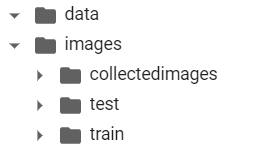

In [12]:
%%bash
cd /content/

mkdir data

mkdir images
cd images
mkdir test
mkdir train
mkdir collectedimages
cd ../
pwd
ls

/content
data
images
models
sample_data


## Parameters

In [13]:
# Path to Images folder
IMAGES_PATH = '/content/images'

# Number of Images
NUM_IMGS = 15

# List of Sign Language labels
labels = ['hello','thanks','yes','no','iloveyou']

# 2. Collect Data

> Capture photos using webcam for each of the labels and store in images folder
-  To take photos, go to sidebar: **code snippets** and search for "webcam"

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Imports

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image
from IPython.display import clear_output 

Clear old photos if it exists

In [ ]:
import shutil
for label in labels:
  PATH = os.path.join(IMAGES_PATH,"collectedimages",label)
  if os.path.exists(PATH):
    shutil.rmtree(PATH)

> **Make sure to enable webcam access**
- To close webcam, close the output 

`view_webcam`: displays the webcam live stream

In [ ]:
def view_webcam(filename='photo.jpg', quality=1.0):
  js = Javascript('''
    // Show Printer output
    var printer = document.createElement('div');
    printer.id = "printer";
    document.body.appendChild(printer);

    async function viewWebcam(quality) {
      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
    }
    ''')
  display(js)
  data = eval_js('viewWebcam({})'.format(quality))

`take_photo()` takes a photo and saves it

In [ ]:
def take_photo(filename='photo.jpg', quality=1.0):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Go through each of the labels and do various gestures to get images 
- Make sure to switch hands and orientations

In [ ]:
os.chdir("/content/")
view_webcam()

def printer(message):
  js = Javascript('''
    async function printing(string) {
      document.getElementById("printer").innerHTML = string;
    }
  ''')
  display(js)
  eval_js('printing("{}")'.format(message))

for label in labels:
  !mkdir {IMAGES_PATH+'/collectedimages/'+label} # create new folder for label
  printer("Collecting images for <strong>{}</strong>".format(label))
  time.sleep(5) # wait for 5 seconds
  for img_num in range(NUM_IMGS):
    imagename = os.path.join(IMAGES_PATH,"collectedimages",label,label+".{}.jpg".format(str(uuid.uuid1())))
    for t in range(2,0,-1): # count down from 2
      printer("{0} in {1} ({2}/{3})".format(label, t, img_num, NUM_IMGS))
      time.sleep(1)
    filename = take_photo(imagename)

clear_output() # close webcam

## 2.1 Sign Language

### hello

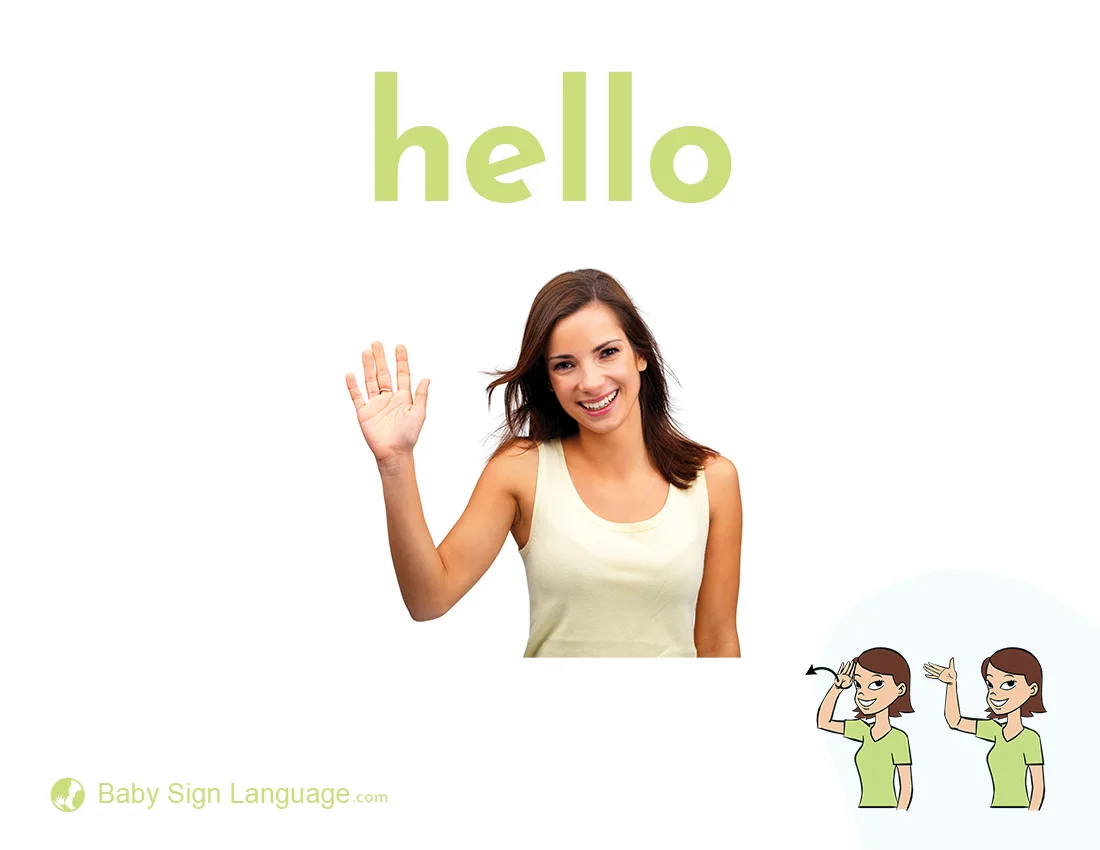

### thanks

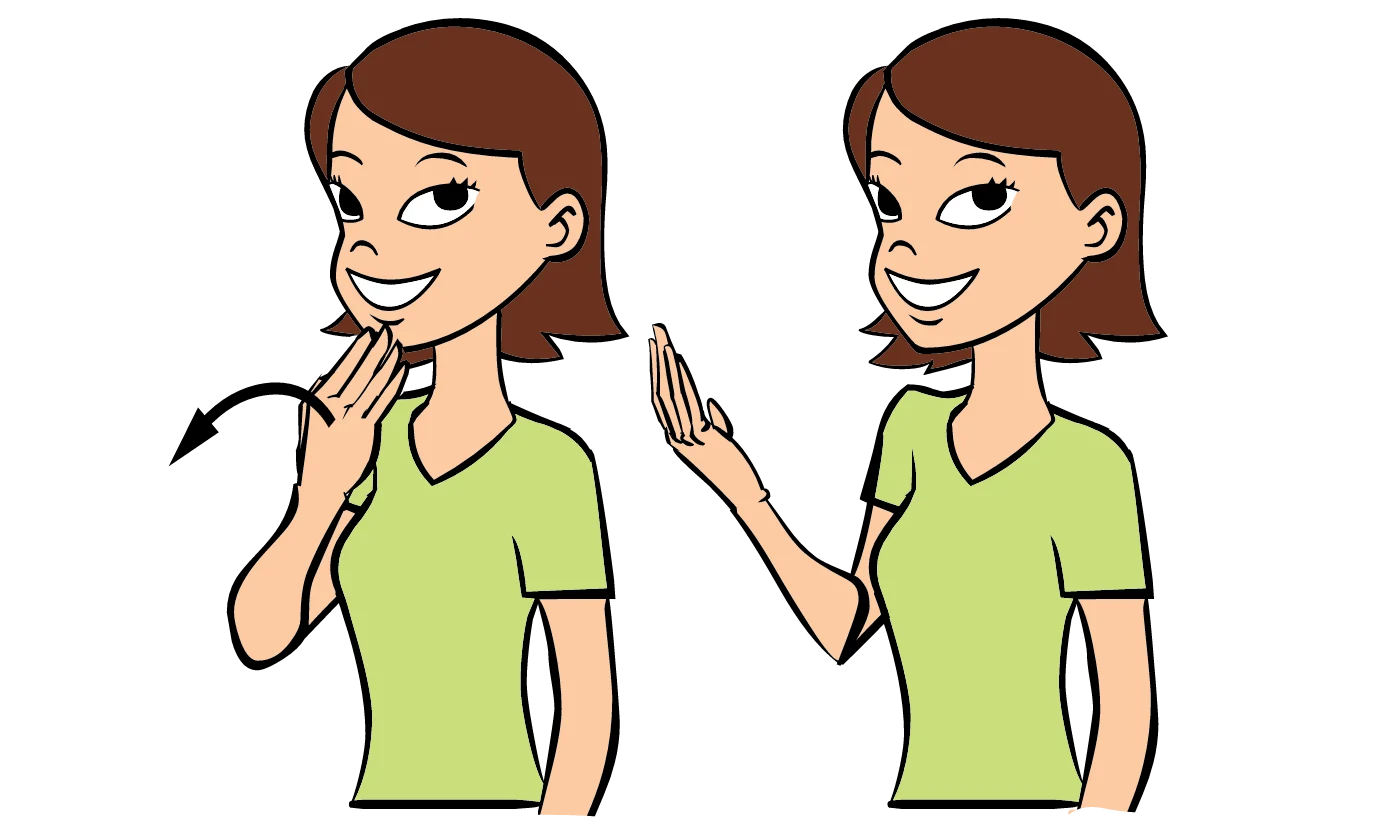

### yes and no

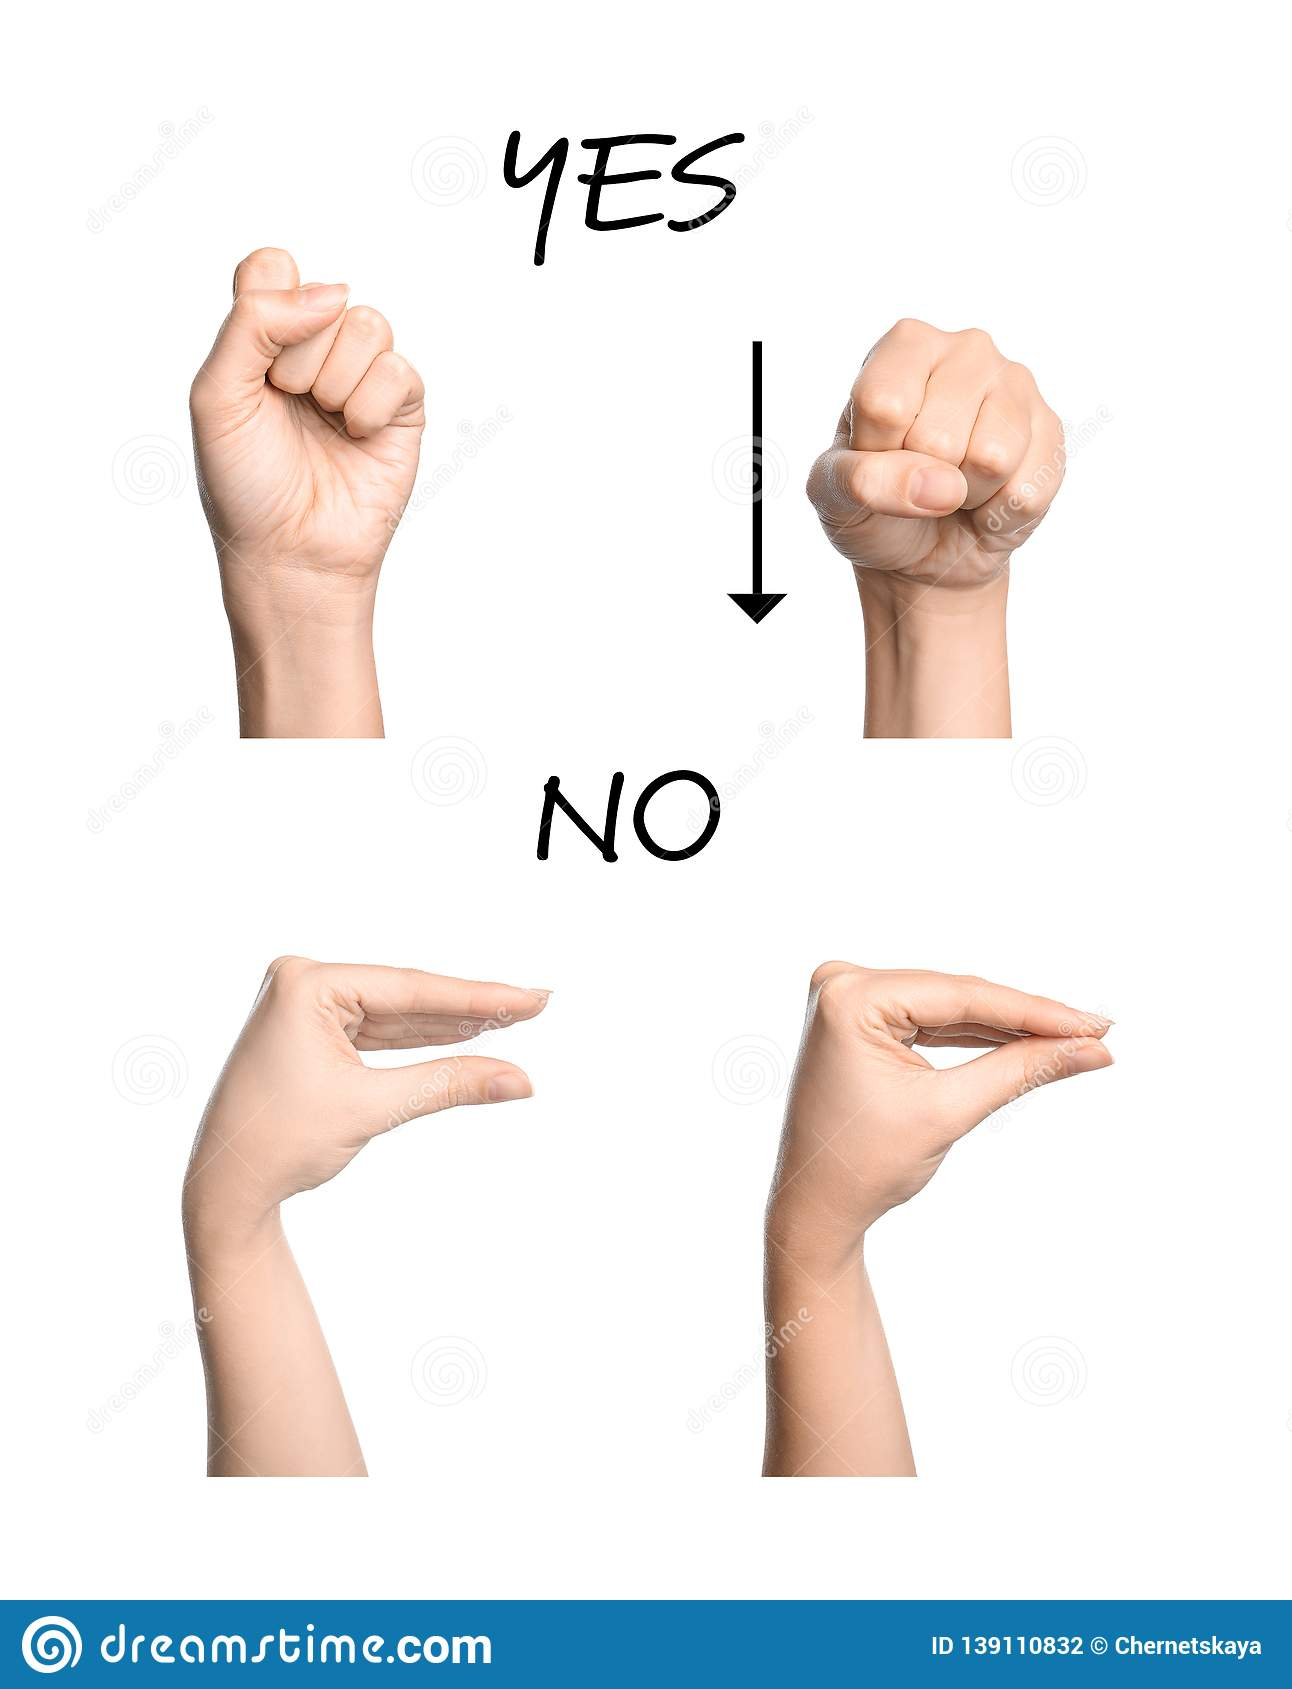

### i love you

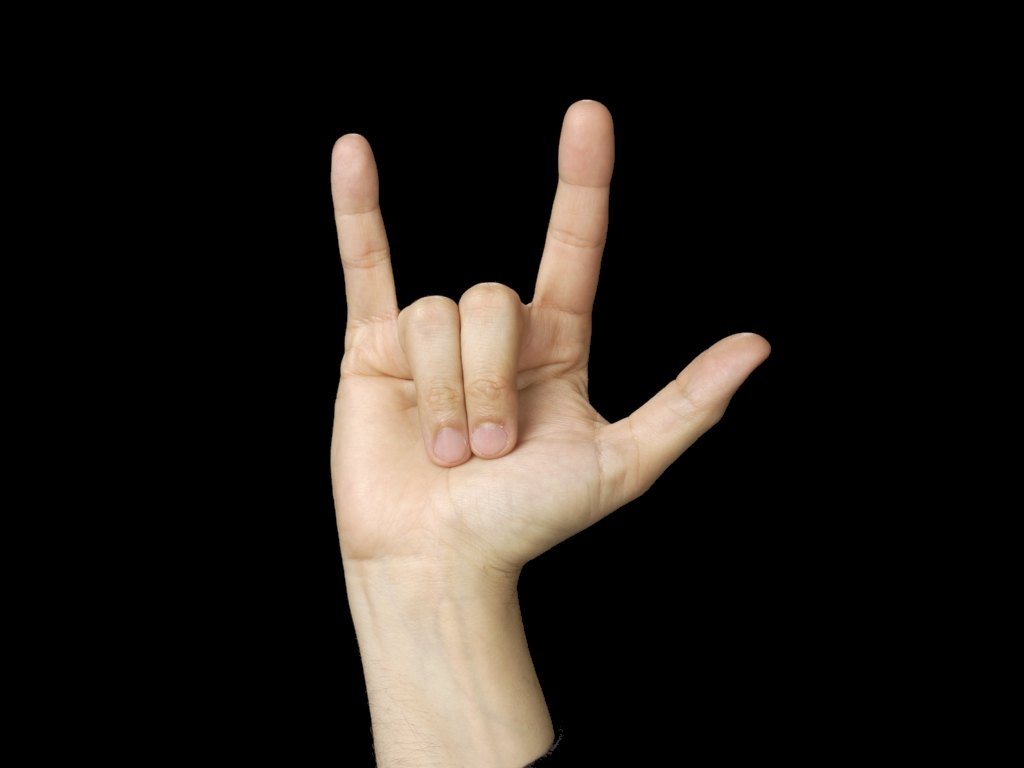

# 3. LabelImg - Labelling Images

## 3.1 Download collectedimages

1. Zip **images** folder
2. Go to *Files* in left bar and click the three dots on the zip file, then **Download**
3. Unzip on local machine

In [ ]:
!zip -r /content/images.zip images

  adding: images/ (stored 0%)
  adding: images/collectedimages/ (stored 0%)
  adding: images/train/ (stored 0%)
  adding: images/test/ (stored 0%)


### 3.1.1 Save Zip File to Google Drive
- Files stored on Colab will disappear

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
!cp -r /content/images.zip /content/drive/MyDrive/

cp: cannot stat '/content/images.zip': No such file or directory


## 3.2 Download [LabelImg](https://github.com/tzutalin/labelImg)
- https://github.com/tzutalin/labelImg

```
git clone https://github.com/tzutalin/labelImg
```

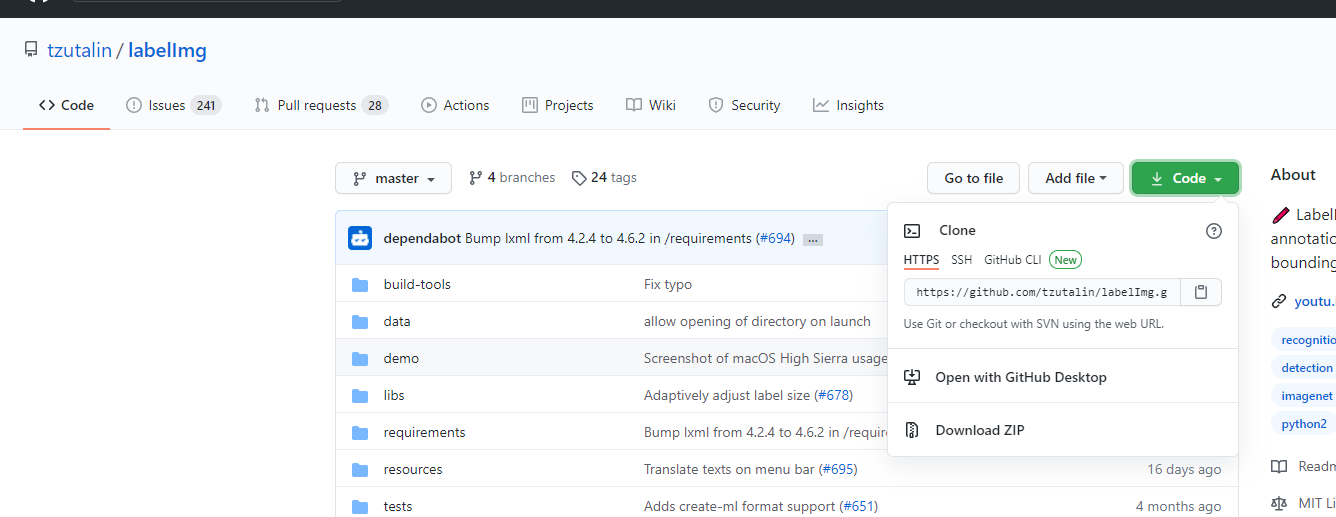

Download the repo by: **Code** > **Download ZIP**

### **Install Dependencies**:
- [Python](https://www.python.org/downloads/)
- PyQt5
  - `pip install pyqt5`
- lxml
  - `pip install lxml`

1. Open Command Prompt
2. `cd` into the downloaded **labelImg` folder
3. Run the `pip install` commands

### Running Labellmg once inside the "labellmg" folder

### Windows
```
pyrcc5 -o libs/resources.py resources.qrc

python labelImg.py
python labelImg.py [IMAGE_PATH] [PRE-DEFINED CLASS FILE]
```
OR using Anaconda
```
conda install pyqt=5
conda install -c anaconda lxml
pyrcc5 -o libs/resources.py resources.qrc
python labelImg.py
python labelImg.py [IMAGE_PATH] [PRE-DEFINED CLASS FILE]
```

### macOS
```
brew install qt  # Install qt-5.x.x by Homebrew
brew install libxml2

or using pip

pip3 install pyqt5 lxml # Install qt and lxml by pip

make qt5py3
python3 labelImg.py
python3 labelImg.py [IMAGE_PATH] [PRE-DEFINED CLASS FILE]
```
OR Using Virtualenv
```
brew install python3
pip3 install pipenv
pipenv run pip install pyqt5==5.12.1 lxml
pipenv run make qt5py3
python3 labelImg.py
[Optional] rm -rf build dist; python setup.py py2app -A;mv "dist/labelImg.app" /Applications
```

### Ubuntu Linux
```
sudo apt-get install pyqt5-dev-tools
sudo pip3 install -r requirements/requirements-linux-python3.txt
make qt5py3
python3 labelImg.py
python3 labelImg.py [IMAGE_PATH] [PRE-DEFINED CLASS FILE]
```

## 3.3 HotKeys

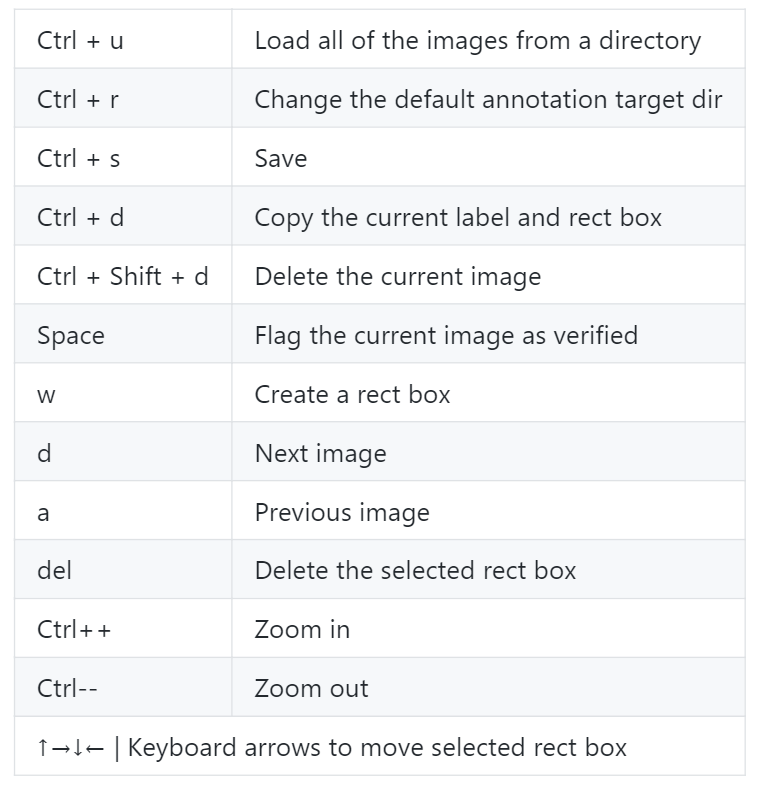

## 3.4 Usage

**Tip:** turn on AutoSave mode: 
- Go to **view**>**Auto Save Mode**

1. Navigate to "labelImg" folder
  - Move all the images from the sub folders into the outer folder
2. Run `python labelImg.py`
3. Click **Open Dir** to open folder with the images 
4. Click **Change Save Dir** and select folder to save images (same folder as *open dir*


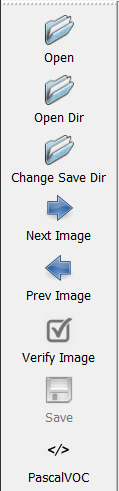

For Each Image: 
1. Hit **w** key to start a new Box

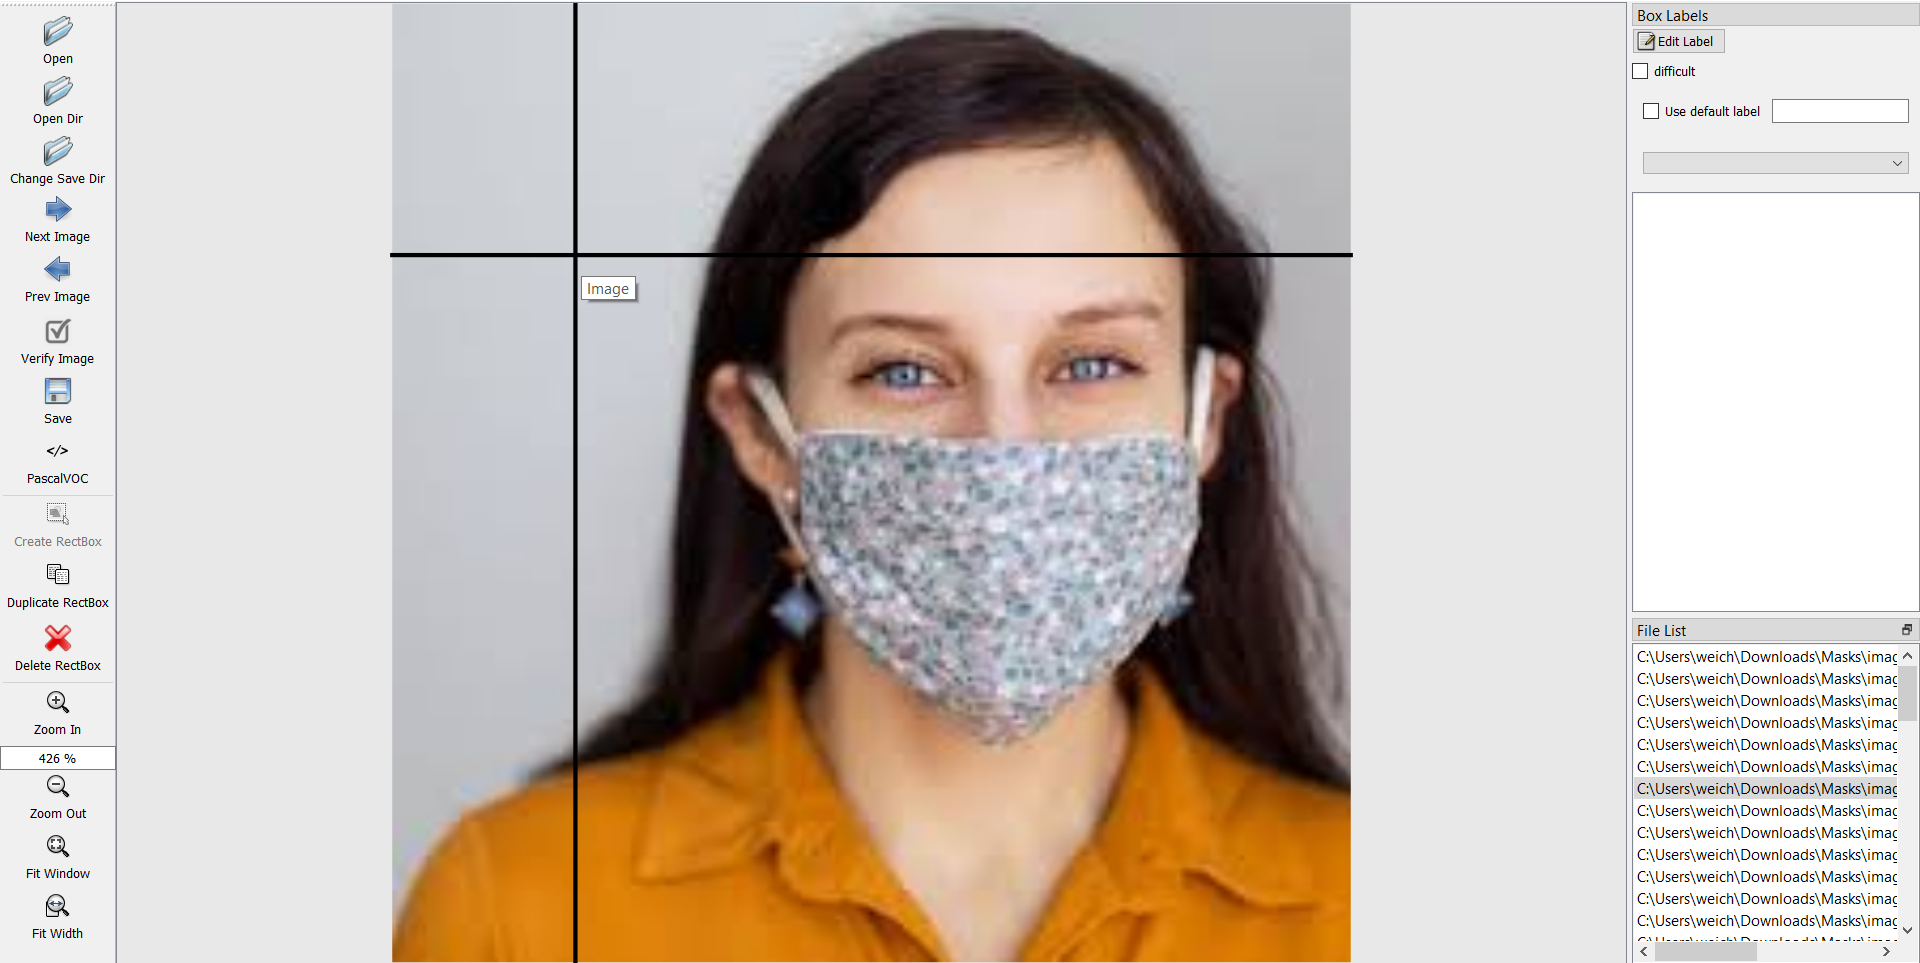

2. Draw the box over the object to identify

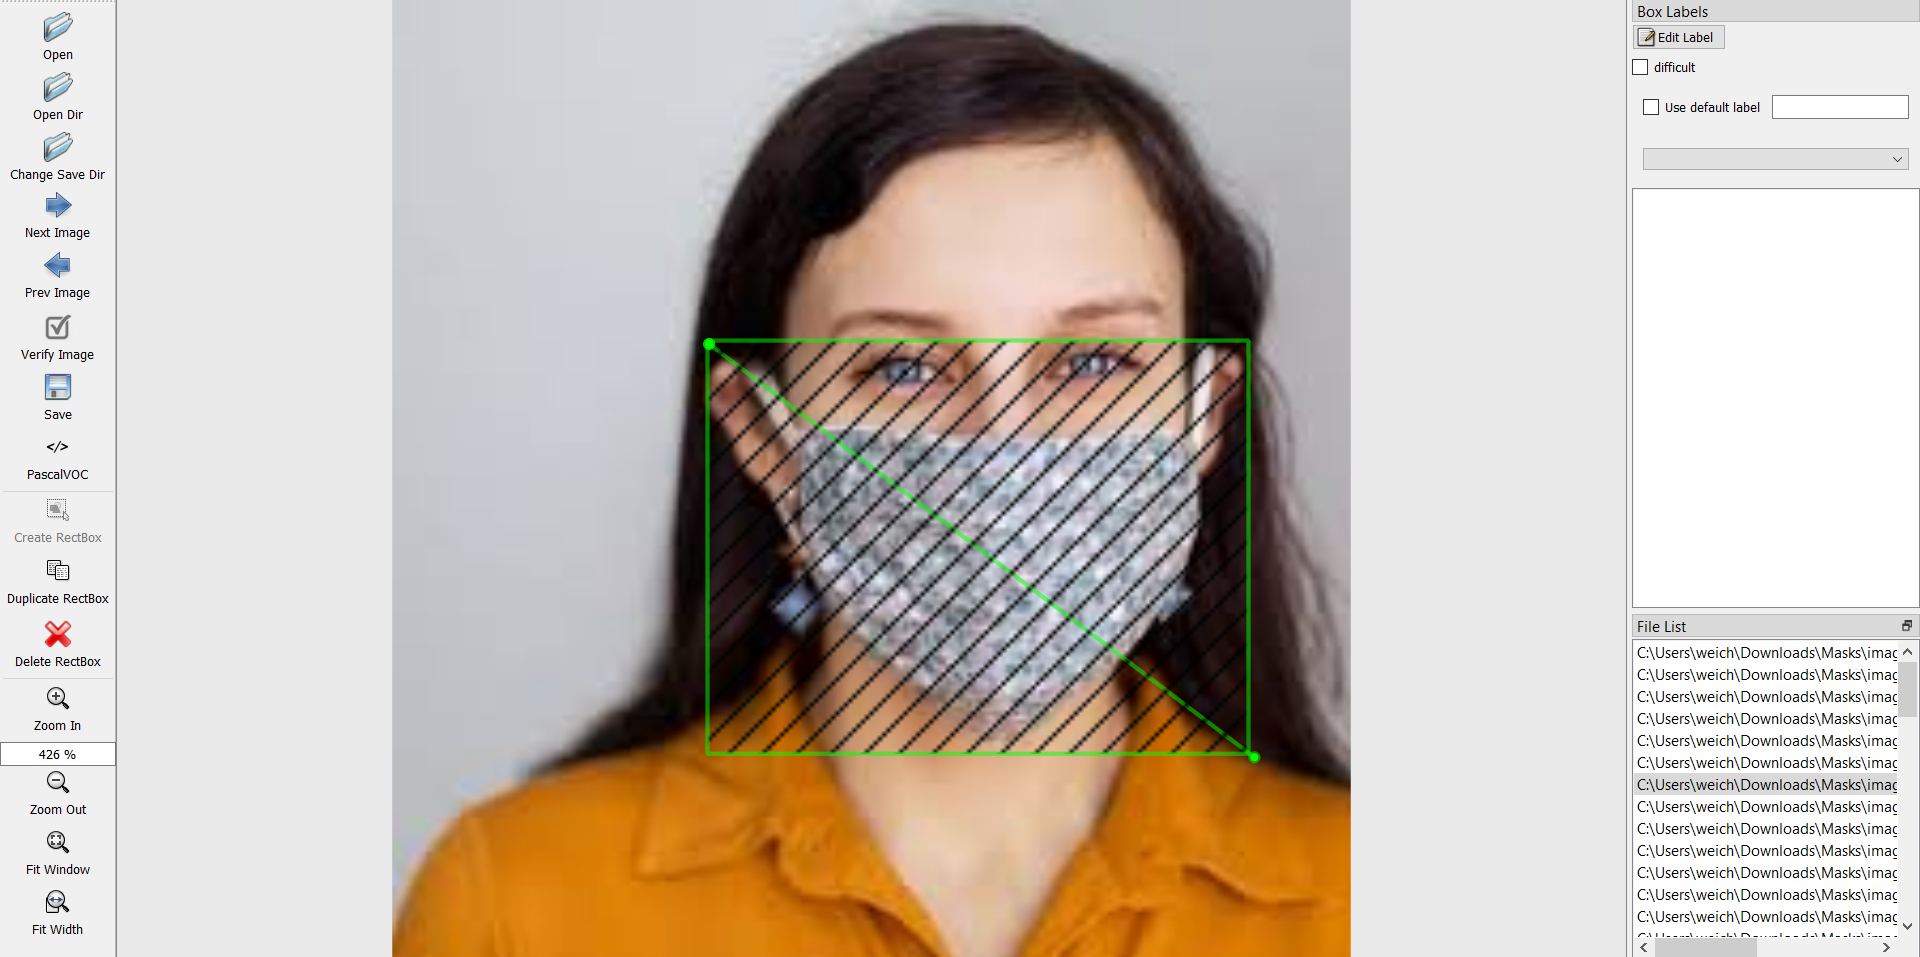

3. Select or type a label and hit OK

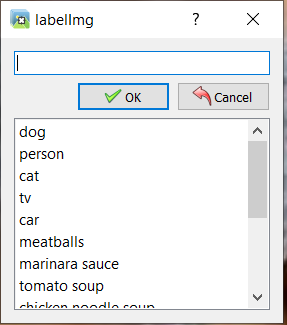

OR if all the object are the same, define a **default** label
1. Go to top right, **Box Labels**
2. Check *Use default label*
3. Enter default label in the text box
Now, all objects will automatically use dafault label without the pop up

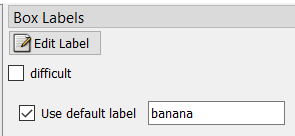

4. Go to next image, by hitting **d** key

## 3.4 Split into test and train images
- 90% for training data - "train" folder
- 10% for testing data - "test" folder

Folder Structure:
- Images Folder:
   - test
   - train

1. Zip the file 
 - Right click folder
 - Send to  > Compressed (zip) folder (for windows)
 - Compress __ items (for mac)
2. Upload to files in Google Colab
3. Unzip: `!unzip <foldername>.zip`
4. Click "Refresh" button to see new folder

Name of image folder

In [ ]:
IMAGE_FOLDER = "images"
IMAGES_PATH = "/content/images_boxed/images"

In [ ]:
import os
os.chdir("/content")

!unzip {IMAGE_FOLDER+".zip"} -d {IMAGE_FOLDER+"_boxed"}

IMAGE_FOLDER = IMAGE_FOLDER+"_boxed"

# 4. Create Label Map and CSV Files

## 4.1 Create Label Map

Each new object in the file has this format:
```
item {
  id: #
  name: "label"
}
```

Create a .pbtxt file to map id to label

In [ ]:
!mkdir data # Make Data folder (if needed)

In [32]:
labels = [{'name':'hello', 'id':1}, 
          {'name':'Yes', 'id':2},
          {'name':'No', 'id':3},
          {'name':'Thank You', 'id':4},
          {'name':'I Love You', 'id':5}]

with open('/content/data/label_map.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## 4.2. XML to CSV

> Convert the xml into a CSV (spreadsheet) file with all the names

In [ ]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main(): # this is the part we change to work with our setup
    for directory in ['train','test']:
        image_path = os.path.join(IMAGES_PATH, directory)
        print(image_path)
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv('/content/data/{}_labels.csv'.format(directory), index=None)
        print('Successfully converted '+directory+' xml to csv.')

main()

/content/images_boxed/images/train
Successfully converted train xml to csv.
/content/images_boxed/images/test
Successfully converted test xml to csv.


**ERROR:** CSV file is empty
 - Filepath is not correct
 - Check folders are named correctly


# 5. Create tf Records


**usage:** 
```
generate_tfrecord.py [-h] [-x XML_DIR] [-l LABELS_PATH] [-o OUTPUT_PATH] [-i IMAGE_DIR] [-c CSV_PATH]
```

**optional arguments:**
-  `-h, --help   `         
  - show this help message and exit
-  `-x XML_DIR, --xml_dir XML_DIR`
  - Path to the folder where the input .xml files are stored.
-  `-l LABELS_PATH, --labels_path LABELS_PATH`
  - Path to the labels (.pbtxt) file.
-  `-o OUTPUT_PATH, --output_path OUTPUT_PATH`
  - Path of output TFRecord (.record) file.
-  `-i IMAGE_DIR, --image_dir IMAGE_DIR`
  - Path to the folder where the input image files are stored. Defaults to the same directory as XML_DIR.
-  `-c CSV_PATH, --csv_path CSV_PATH`
  - Path of output .csv file. If none provided, then no file will be written.

> tf-records (.record) used when training

## 5.1 Imports

In [ ]:
os.chdir("/content")
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

## 5.2 Paths

In [37]:
DATA_FOLDER_PATH = "/content/data"
LABELS_PATH = "/content/data/label_map.pbtxt"

## 5.3 Generate_tfrecord helper functions

In [ ]:
"""
Usage:
  # From tensorflow/models/
  # Create train data:
  python generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=train.record  --image_dir=images/train
  # Create test data:
  python generate_tfrecord.py --csv_input=data/test_labels.csv  --output_path=data/test.record --image_dir=images/test
"""

label_map = label_map_util.load_labelmap(LABELS_PATH)
label_map_dict = label_map_util.get_label_map_dict(label_map)

def class_text_to_int(row_label):
    return label_map_dict[row_label]

def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

def create_tf_example(group, path):
    with tf.io.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

## 5.4 generate_tfrecord function

generate_tfrecord()
> Inputs:
  - **csv_input**: Path to the CSV input
  - **output_path**: Path to output TFRecord
  - **image_dir**: Path to images

In [ ]:
def generate_tfrecord(csv_input, output_path, image_dir):
    writer = tf.io.TFRecordWriter(output_path)
    path = os.path.join(image_dir)
    examples = pd.read_csv(csv_input)
    grouped = split(examples, 'filename')
    for group in grouped:
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())
    writer.close()
    output_path = os.path.join(os.getcwd(), output_path)
    print('Successfully created the TFRecords: {}'.format(output_path))

In [ ]:
# Call generate_tfrecord

# Train Data
generate_tfrecord(DATA_FOLDER_PATH+"/train_labels.csv", DATA_FOLDER_PATH+"/train.record", IMAGES_PATH+"/train")

# Test Data
generate_tfrecord(DATA_FOLDER_PATH+"/test_labels.csv", DATA_FOLDER_PATH+"/test.record",  IMAGES_PATH+"/test")

Successfully created the TFRecords: /content/data/train.record
Successfully created the TFRecords: /content/data/test.record


### 5.4.1 Errors

```
KeyError: ____
```

**Solution:** the naming of labels in LabelImg application was not the same as in the `label_map.pbtxt` file
  1. Go to `train_labels.csv` file and check the **class**, if  you renamed all the classes, then go to `label_map.pbtxt` file 
  2. Change the `name` to your misspelled label
  3. CTRL + s to save
  4. If you mixed the labels, just add a new label
  5. Re-run **5.3 cell** again to update the `label_map_dict` variable

```
  Could not find image at _______.jpg
```

**Solution:** the image and XML file are not in pairs, delete it


# 6. Pre-trained Model

**Transfer Learning:** building model on top of pre-trained model (saves days or even weeks of training time)

## 6.1 Tensorflow Model Zoo
> Download pre-trained model from Tensorflow model zoo: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

1. Select Model from Model Zoo Github
2. Hover cursor over model to see url
3. Right click > **Copy link address** to get link
> For Example: *ssd_resnet50_v1_fpn_640x640_coco17_tpu-8* is http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
> For Example: *ssd_mobilenet_v2_fpnlite* is http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
> For Example: *CenterNet HourGlass104 512x512* is 
http://download.tensorflow.org/models/object_detection/tf2/20200713/centernet_hg104_512x512_coco17_tpu-8.tar.gz

In [14]:
MODEL_NAME = "ssd_resnet50_v1_fpn_640x640_coco17_tpu-8"
MODEL_DOWNLOAD_LINK = "http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz"
MODEL_PATH = "/content/"+MODEL_NAME

Download pre-trained model to */content/models/research/object_detection*

In [15]:
import six.moves.urllib as urllib
import tarfile
import os

In [16]:
if not os.path.exists(MODEL_PATH):
    urllib.request.urlretrieve(MODEL_DOWNLOAD_LINK, MODEL_NAME+".tar.gz")
    tar_file = tarfile.open(MODEL_NAME+".tar.gz")
    tar_file.extractall("/content")
    tar_file.close()
    os.remove(MODEL_NAME+".tar.gz")

**Rename the checkpoint** folder inside the newly downloaded model folder. Rename to `checkpoint0`
- Model Folder
  - `checkpoint0`
  - `saved_model`
  - `pipeline.config`

In [18]:
!mv $MODEL_PATH/checkpoint $MODEL_PATH/checkpoint0

mv: cannot stat '/content/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint': No such file or directory


## 6.3 Config file

- In the **downloaded model folder**(/content/*model*), find the `pipeline.config` file, make the following changes:
- All `**PATH_TO_BE_CONFIGURED**` must be changed

1. `num_classes`: number of objects
  - Set `num_classes:5`
2. `batch_size`: number of images to train per cycle
  - Set `batch_size:4`
3. `fine_tune_checkpoint`: path to model checkpoint 
   - Set `fine_tune_checkpoint: "/content/**MODEL_NAME**/checkpoint0/ckpt-0"`
    - Replace `**MODEL_NAME**` with the name of your pre-trained model
4. `fine_tune_checkpoint_type`: type 
  - Set `fine_tune_checkpoint_type: "detection"`
5. `use_bfloat16`: should only be true if TPU is used (we're using GPU) [ONLY SOME MODELS]
  - Set `use_bfloat16: false`
6. `label_map_path`: path to label_map.pbtxt file
  - Set `label_map_path: "/content/data/label_map.pbtxt"`
7. `input_path`:path to train.record in `train_input_reader`
  - Set `input_path: "/content/data/train.record"`
8. `label_map_path`: path to label_map.pbtxt file
  - Set `label_map_path: "/content/data/label_map.pbtxt"`
9. `input_path`:path to test.record in `eval_input_reader`
  - Set `input_path: "/content/data/test.record"`

Hit CTRL + S to save file

# 7. Tensorboard

> TensorBoard provides the visualization and tooling needed for machine learning experimentation:
- Tracking and visualizing metrics such as loss and accuracy
- Visualizing the model graph (ops and layers)
- Viewing histograms of weights, biases, or other tensors as they change over time
- Projecting embeddings to a lower dimensional space
- Displaying images, text, and audio data
- Profiling TensorFlow programs

- **Zoom:** ALT + scroll
- **Pan:** SHIFT + drag

In [ ]:
#start the Tensorboard
%load_ext tensorboard
%tensorboard --logdir=$MODEL_PATH

# 8. Train

> Training will take a few hours

> Click reload on Tensorboard to see Training stats

**Training Command**
```
!python /content/models/research/object_detection/model_main_tf2.py --model_dir=$MODEL_PATH --pipeline_config_path={MODEL_PATH+"/pipeline.config"} \
--num_train_steps=10000
```
> Change `num_train_steps` to increase/decrease number of training steps

**Save LAST_CKPT**: After training, the last checkpoint is saved to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py --model_dir=$MODEL_PATH --pipeline_config_path={MODEL_PATH+"/pipeline.config"} \
--num_train_steps=10000

# Save Last Checkpoint to Drive
LAST_CKPT = sorted(list(filter(lambda x: x.startswith("ckpt"), os.listdir('/content/'+MODEL_NAME))), key=lambda x: int(x.split(".")[0].replace('ckpt-','')))[-1].split('.')[0]
!cp -r {MODEL_PATH+"/"+LAST_CKPT+".index"} /content/drive/MyDrive/
!cp -r {MODEL_PATH+"/"+LAST_CKPT+".data-00000-of-00001"} /content/drive/MyDrive/
print('Saved',LAST_CKPT,'to Drive')

Training correctly when you see the following:
```
...
Use fn_output_signature instead
INFO:tensorflow:Step 100 per-step time 0.631s loss=0.801
I0103 16:36:09.918514 140631233124224 model_lib_v2.py:651] Step 100 per-step time 0.631s loss=0.801
INFO:tensorflow:Step 200 per-step time 0.633s loss=0.911
I0103 16:37:13.535142 140631233124224 model_lib_v2.py:651] Step 200 per-step time 0.633s loss=0.911
INFO:tensorflow:Step 300 per-step time 0.634s loss=0.823
I0103 16:38:16.827244 140631233124224 model_lib_v2.py:651] Step 300 per-step time 0.634s loss=0.823
...
```

See `ckpt` will appear in model folder, these are checkpoints from training

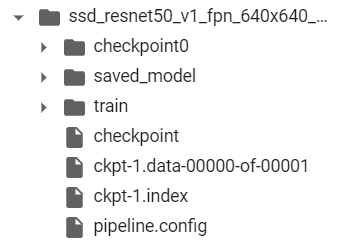

## 8.1 Errors

```
WARNING:tensorflow:A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/guide/checkpoint#loading_mechanics for details.
W0102 01:20:47.031699 139790156818304 util.py:169] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/guide/checkpoint#loading_mechanics for details.
```
**Solution**: make sure that `fine_tune_checkpoint_type` is set to `"detection`, and not classification. If that doesn't work, use another model

```
tensorflow.python.framework.errors_impl.FailedPreconditionError: /content/models/research/object_detection/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint.tmp979b03c6466c48019239906af69ae7fd; Is a directory
```
**Solution:** 
1. Create a new folder and set its path as the argument for --model_dir
2. Check if there is a folder named 'checkpoint', if there is, then change the folder name. In my case, I changed it to 'checkpoint0'.

> `^C` Error: training stops with no error, RAM at top right is in the orange

**Solution:** too much RAM used, decrease **batch_size** in `pipeline.config` file

Training is stuck at this:
```
...
Use `tf.cast` instead.
2021-01-03 16:34:20.255698: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-01-03 16:34:20.263869: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz
...
```
**Solution:** make sure that `test_labels.csv`, `train_labels.csv`, `test.record`, and `train.record` are NOT empty.
If they are empty, check that the path to correct when generating CSV and tf-records

# 9. Load Train Model from Checkpoint

## 9.1 Import Checkpoint (If Needed)

1. If **models** folder has been reset, re-run setup to re-download the folder (if needed)
2. Re-download the pre-trained model (if needed)
3. Re-run the label_map.pbtxt code (if needed)
4. Upload last checkpoint from training to /content/MODEL_NAME

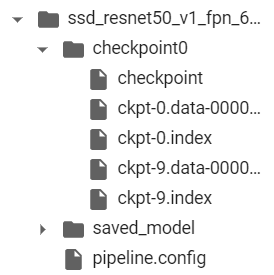

### Option 1: Upload from Google Drive

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
LAST_CKPT = "ckpt-12" 
GOOGLE_DRIVE_PATH = "/content/drive/MyDrive/"

Copy checkpoints to folder
- `ckpt-#.index`
- `ckpt-#.data-00000-of-00001`

In [23]:
!cp -r {GOOGLE_DRIVE_PATH+"/"+LAST_CKPT+".index"} $MODEL_PATH/checkpoint0
!cp -r {GOOGLE_DRIVE_PATH+"/"+LAST_CKPT+".data-00000-of-00001"} $MODEL_PATH/checkpoint0

### Option 2: Upload Directly to Colab From PC 

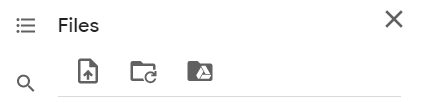

1. In Left Bar Menu, Go to **Files**
2. Click "Upload to session storage" (leftmost button)
3. Move files to MODEL_NAME/checkpoint0 folder

## 9.2 Load the Model

In [60]:
import os
os.chdir("/content/models")
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [61]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(MODEL_PATH+"/pipeline.config")
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(MODEL_PATH, "checkpoint0",LAST_CKPT)).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 10. Export Model

## 10.1 Export Model 

Export model using `exported_main_v2.py`
1. Edit `pipeline.config` (if not edited/refreshed)
2. Change `ckpt` in `checkpoint` file to most recent ckpt


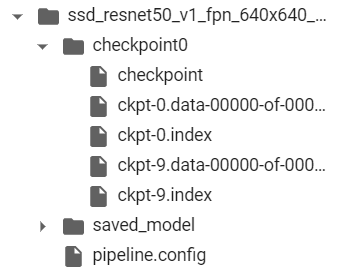

In [62]:
!python /content/models/research/object_detection/exporter_main_v2.py --input_type=image_tensor --pipeline_config_path=$MODEL_PATH/pipeline.config --trained_checkpoint_dir=$MODEL_PATH/checkpoint0 --output_directory=/content/exported_model

2021-03-13 02:40:08.127772: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-03-13 02:40:10.149551: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-13 02:40:10.150381: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-13 02:40:10.156293: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-13 02:40:10.156749: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-03-13 02:40:10.156793: I tensorflow/stream_executor/platform/default/dso_loade

See new exported folder called `exported_model` in /content/

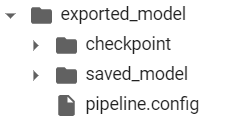

### 10.1.1 Zip and Download `exported_model`

In [63]:
!zip -r /content/exported_model.zip exported_model

	zip warning: name not matched: exported_model

zip error: Nothing to do! (try: zip -r /content/exported_model.zip . -i exported_model)


## 10.2 Errors

```
AssertionError: No checkpoint specified (save_path=None); nothing is being restored.
```
**Solution:** your `trained_checkpoint_dir` should be in same folder as **checkpoint** file. So, move into checkpoint folder

```
tensorflow.python.framework.errors_impl.NotFoundError: Could not find checkpoint or SavedModel at /content/models/research/object_detection/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/ckpt-0.
```
**Solution:** check paths of exporter_main_v2 are correct, or go into `checkpoint` file and change all `ckpt-0` to `ckpt-9` or the last checkpoint

```
ValueError: Tensor's shape (3, 3, 256, 546) is not compatible with supplied shape (3, 3, 256, 36)
```
**Solution:** it is looking for `ckpt-0` which is the wrong checkpoint file, open `checkpoint` **file**:
```
model_checkpoint_path: "ckpt-0"
all_model_checkpoint_paths: "ckpt-0"
all_model_checkpoint_timestamps: 1594350057.1342435
last_preserved_timestamp: 1594350055.0480783
```
Change all the `ckpt-0` to the last checkpoint value in only the following fields:
- `model_checkpoint_path`
- `all_model_checkpoint_paths`
```
model_checkpoint_path: "ckpt-9"
all_model_checkpoint_paths: "ckpt-9"
all_model_checkpoint_timestamps: 1594350057.1342435
last_preserved_timestamp: 1594350055.0480783
```

# 11. Prediction Setup

Imports

In [64]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

`EXPORTED_MODEL_PATH` is path to `saved_model.pb` file

In [65]:
EXPORTED_MODEL_PATH = "/content/exported_model/saved_model"

Load saved model and build the detection function

In [66]:
detection_model = tf.saved_model.load(EXPORTED_MODEL_PATH)

Loading the label_map

In [67]:
category_index = label_map_util.create_category_index_from_labelmap(LABELS_PATH,use_display_name=True)

# 12. Running the Model

## 12.1 Upload Image

In [68]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [69]:
def show_inference(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  # Actual detection.
  output_dict = run_inference_for_single_image(model, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

  display(Image.fromarray(image_np))

### Upload a **JPEG** file 

In [52]:
from google.colab import files
upload = files.upload()

Saving WIN_20210226_17_32_40_Pro.jpg to WIN_20210226_17_32_40_Pro.jpg


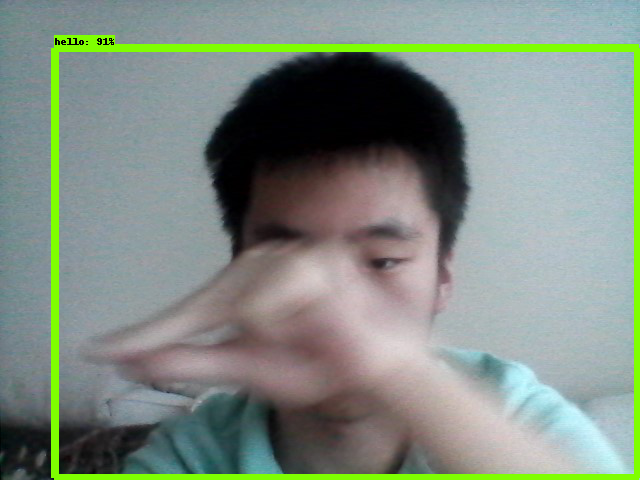

In [53]:
show_inference(detection_model, list(upload.keys())[0])

## 12.2. Real-time Detection with Webcam

> Make sure your webcam is *enabled* in the browser

### 12.2.1 Realtime Detection Functions

Imports

In [70]:
import base64
import html
import io
import time
from PIL import Image
from IPython.display import display, Javascript
from google.colab.output import eval_js

Javascript functions to interact with webcam

In [71]:
def start_input():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 512, 512);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid #d3d3d3';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status: </span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'Click Video to Stop</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 512; //video.videoWidth;
      captureCanvas.height = 512; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function takePhoto(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def take_photo(label, img_data):
  data = eval_js('takePhoto("{}", "{}")'.format(label, img_data))
  return data

`realtimme_run_inference_for_single_image` makes the prediction using the machine learning model, then returns the results (the object and the boxes)

In [72]:
def realtime_run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

`realtime_show_inference` takes the data_url from the webcam and does pre-processing, then calls `realtimme_run_inference_for_single_image` to do the prediction, before coverting it back to a data_url

In [73]:
def realtime_show_inference(js_reply, capture_start, capture_end):
  # Javascript returns a data URL, like:
  #     data: image/jpeg;base64,<base-64 encoded data>
  # To use the image, decode the base-64 encoded part and treat it as a JPEG.
  data_url = io.BytesIO(base64.b64decode(js_reply['img'].split(',')[1]))  # parse js_reply to get only image data
  data_url.seek(0)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(data_url))
  
  # predict using numpy array 
  # Actual detection.
  output_dict = realtime_run_inference_for_single_image(detection_model, image_np)
  detect_end = time.time()
    
  # To reduce transfer sizes, we send just the bounding boxes drawn on a 
  # transparent PNG. Here, we create a blank PNG (matrix of zeros)
  rgb_shape = image_np.shape
  rgba_shape = list(rgb_shape)[0:2] + [4]
  image_np = np.zeros(rgba_shape, dtype=np.uint8)

  # Visualization of the results of a detection.
  # Draw the bounding boxes in the RGB channels.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np[:, :, 0:3],  # sub-select RGB channels only; alpha is done below.
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

  # To be visible, the alpha channel also needs to be edited. Set the alpha
  # channel to 255 (fully opaque) wherever anything was drawn.
  image_t = image_np.transpose()
  max_color = np.maximum(np.maximum(image_t[0], image_t[1]), image_t[2])
  image_t[3] = np.clip(max_color, 0, 1) * 255
  viz_end = time.time()

  # Save the image as a PNG in memory and assemble a data URL.
  im = Image.fromarray(image_np, 'RGBA')
  iobuf = io.BytesIO()
  im.save(iobuf, format='png')
  img_data = 'data:image/png;base64,{}'.format(
        (str(base64.b64encode(iobuf.getvalue()), 'utf-8'))) # image data

  # Measured metric
  perf_measures = {
      'server': (
          ('take_photo', capture_end - capture_start),
          ('run_detection', detect_end - capture_end),
          ('visualize', viz_end - detect_end)
      ),
      'js': (
          ('create', js_reply['create']),
          ('show', js_reply['show']),
          ('capture', js_reply['capture']),
      ),
  }

  # Text at top
  label_text = 'img size: {}b\n  server: {}\n  js: {}'.format(
      len(js_reply['img']),
      ', '.join('{}: {:2.3f}s'.format(*x) for x in perf_measures['server']),
      ', '.join('{}: {:2.3f}s'.format(x[0], x[1] / 1000) for x in perf_measures['js']),
  )
  
  label_html = html.escape(label_text).replace('\n', '<br/>')

  return {
      "img_data":img_data,
      "label_html":label_html
  }

## 12.2.2 Run Realtime Detection

In [ ]:
start_input()

label_html = 'Capturing...'
img_data = '' # boxes that are displayed

while True: # loop forever
  # take the picture and draws the boxes
  capture_start = time.time() # start capturing time =========
  js_reply = take_photo(label_html, img_data) # take a photo
  capture_end = time.time()   # end capturing time ===========
  if not js_reply:
    break # if None is returned from take_photo(), unable to take photo
  
  # Make prediction from picture
  output = realtime_show_inference(js_reply, capture_start, capture_end)

  # Update the label and boxes
  img_data = output["img_data"]
  label_html = output["label_html"]

<IPython.core.display.Javascript object>